In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

In [2]:
data = pd.read_csv('Employee.csv')
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
JoiningYear,4653.0,2015.062970,1.863377,2012.0,2013.0,2015.0,2017.0,2018.0
PaymentTier,4653.0,2.698259,0.561435,1.0,3.0,3.0,3.0,3.0
Age,4653.0,29.393295,4.826087,22.0,26.0,28.0,32.0,41.0
ExperienceInCurrentDomain,4653.0,2.905652,1.558240,0.0,2.0,3.0,4.0,7.0
LeaveOrNot,4653.0,0.343864,0.475047,0.0,0.0,0.0,1.0,1.0


In [4]:
data.isna().any()

Education                    False
JoiningYear                  False
City                         False
PaymentTier                  False
Age                          False
Gender                       False
EverBenched                  False
ExperienceInCurrentDomain    False
LeaveOrNot                   False
dtype: bool

Visualization

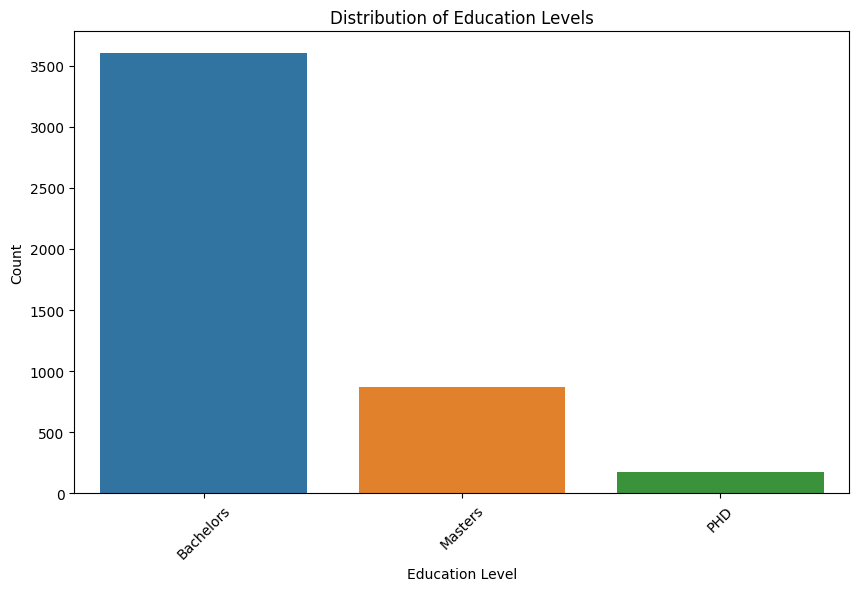

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Education', fill=True)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.xticks(rotation=45)
plt.show()



<Axes: xlabel='Education', ylabel='PaymentTier'>

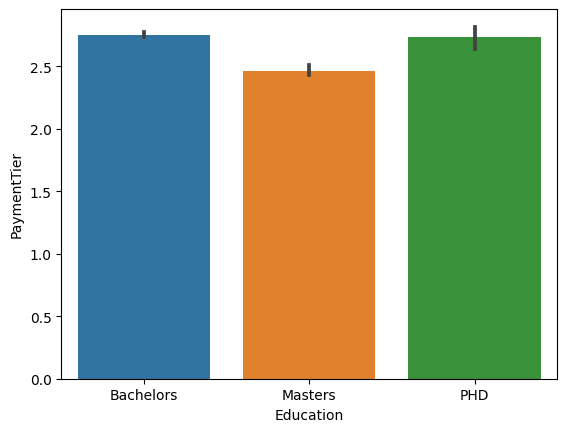

In [6]:
sns.barplot(data, x = 'Education', y = 'PaymentTier')

<Axes: xlabel='Education', ylabel='ExperienceInCurrentDomain'>

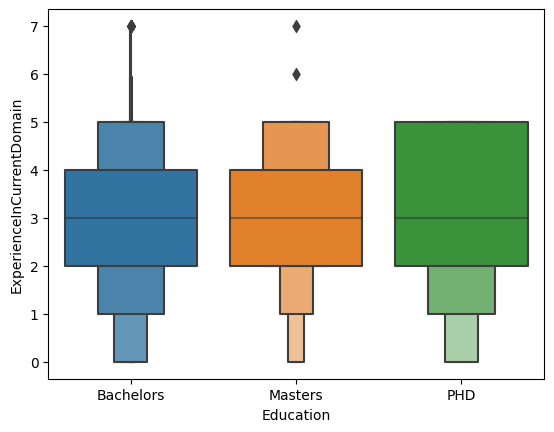

In [7]:
sns.boxenplot(data, x = 'Education', y ='ExperienceInCurrentDomain')

/var/folders/yq/sbcn4y5n0zl14q1_s6x_1sbr0000gn/T/ipykernel_43436/941753645.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age, kde = False, bins = 19)


<Axes: xlabel='Age'>

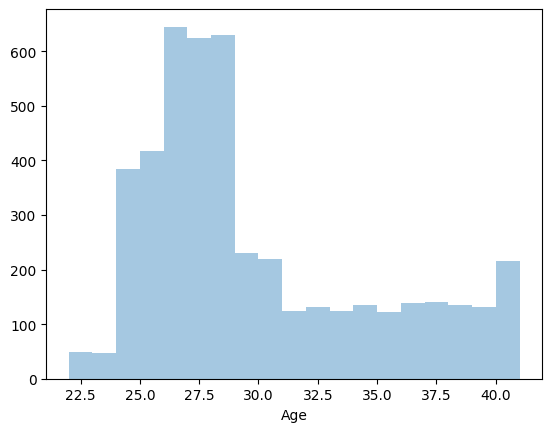

In [8]:
sns.distplot(data.Age, kde = False, bins = 19)


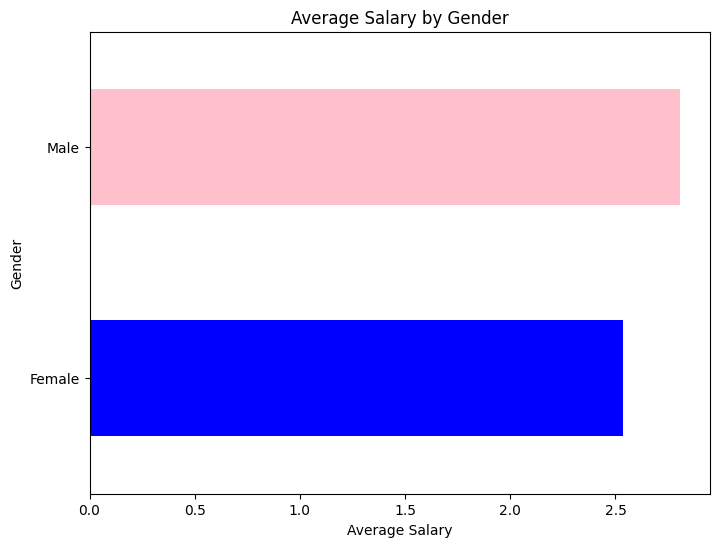

In [9]:
average_salary_by_gender = data.groupby('Gender')['PaymentTier'].mean()

plt.figure(figsize=(8, 6))
average_salary_by_gender.plot(kind='barh', color=['blue', 'pink'])
plt.xlabel('Average Salary')
plt.ylabel('Gender')
plt.title('Average Salary by Gender')
plt.show()

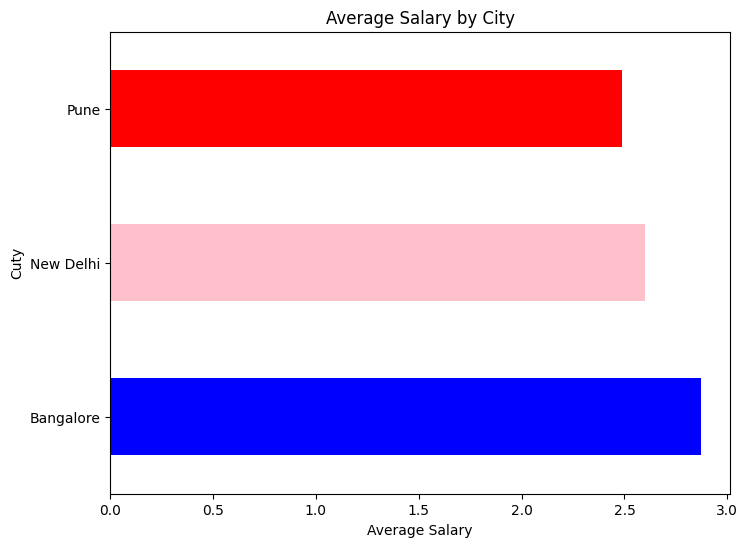

In [10]:
average_salary_by_city = data.groupby('City')['PaymentTier'].mean()

plt.figure(figsize=(8, 6))
average_salary_by_city.plot(kind='barh', color=['blue', 'pink', 'red'])
plt.xlabel('Average Salary')
plt.ylabel('Cuty')
plt.title('Average Salary by City')
plt.show()

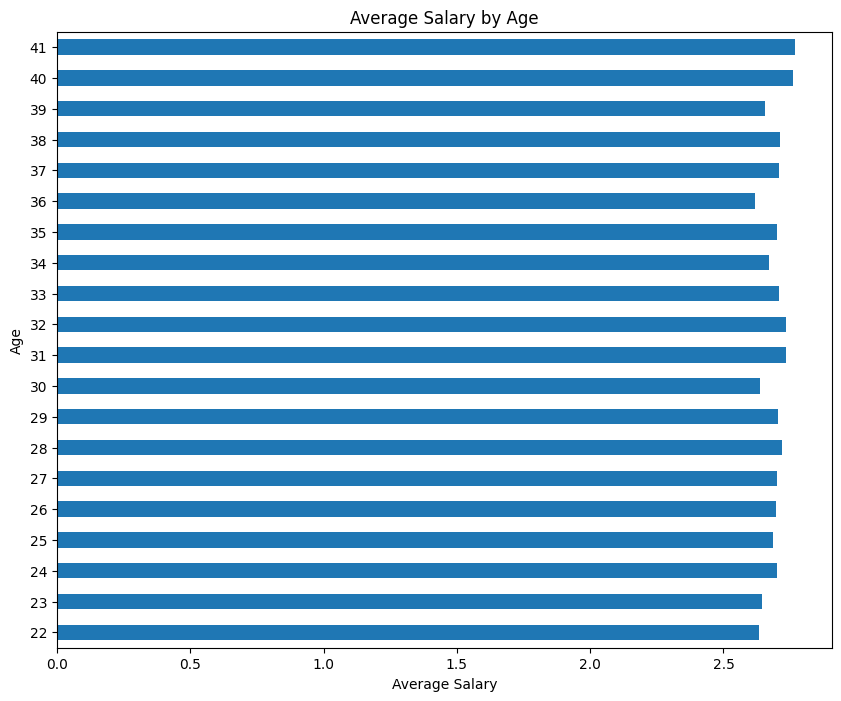

In [11]:
avg_salary_by_age = data.groupby('Age')['PaymentTier'].mean()

plt.figure(figsize=(10,8))
avg_salary_by_age.plot(kind= 'barh')
plt.xlabel('Average Salary')
plt.ylabel('Age')
plt.title('Average Salary by Age')
plt.show()

Clustering

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

features = ['Age', 'ExperienceInCurrentDomain']

categorical_features = ['Education', 'Gender', 'EverBenched']

numeric_transformer = StandardScaler()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features),
        ('cat', categorical_transformer, categorical_features)
    ])


kmeans = Pipeline(steps=[('preprocessor', preprocessor),
                          ('kmeans', KMeans(n_clusters=3))])

kmeans.fit(data)

# Передбачення кластерів для даних
labels = kmeans.predict(data)

print(labels)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 0 2 ... 0 1 0]


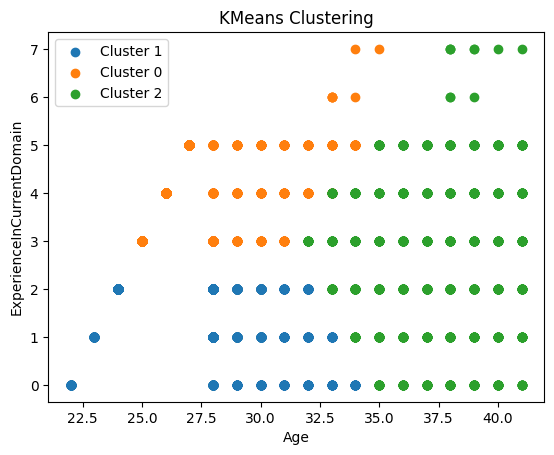

In [13]:
data['Cluster'] = labels
feature1 = 'Age'
feature2 = 'ExperienceInCurrentDomain'

for cluster in data['Cluster'].unique():
    plt.scatter(data[data['Cluster'] == cluster][feature1], 
                data[data['Cluster'] == cluster][feature2],
                label=f'Cluster {cluster}')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('KMeans Clustering')
plt.legend()
plt.show()